This project uses "Baltimore City Crime data" for exploratory data analysis. The data source location is below
https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

In the project1, we answered the below two basic questions related to the dataset.
1. Which district in Baltimore has highest number of crimes reported so far.
2. What is the common crime type in Baltimore and what is the common weapon used.

In this project, we are going to explore the dataset further and try answering the below questions.
1. What is the type of crime that is commonly reported to occur indoors.
2. What is the year that has highest crime incidents reported in Baltimore
3. What are the months that have highest and least crime incidents reported in Baltimore.
4. Is there any pattern in the number of crimes with respect to seasons (like winter/Summer)?
5. Is there any pattern in the number of crimes with respect to weekdays/weekend?
6. What is the common weapon used for the crimes reported to occur outdoors.


In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Find python version (just for reference)

from platform import python_version
print(python_version())

3.7.3


In [3]:
# Find pandas version (just for reference)

print('Pandas version is', pd.__version__)

Pandas version is 0.24.2


Python version used is 3.7.3 and Pandas version is 0.24.2

### Dataset preparation:

In [4]:
# Import the csv file using pandas dataframe and examine it.

df = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv", low_memory=False)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/15/2020,00:20:00,3AJF,3000 DUPONT AVE,ROBBERY - CARJACKING,O,FIREARM,532,NORTHERN,CYLBURN,-76.665561,39.344253,NaN,STREET,NaN,1
1,02/15/2020,03:20:00,3AJK,4100 CREST HEIGHTS RD,ROBBERY - CARJACKING,O,KNIFE,631,NORTHWEST,FALLSTAFF,-76.710523,39.360212,NaN,STREET,NaN,1
2,02/15/2020,21:40:00,4E,2000 E NORTH AVE,COMMON ASSAULT,I,NaN,331,EASTERN,SOUTH CLIFTON PARK,-76.590352,39.312410,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/15/2020,21:50:00,4C,3000 ELIZABETH AVE,AGG. ASSAULT,I,OTHER,923,SOUTHERN,LAKELAND,-76.651585,39.254358,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/15/2020,03:00:00,6G,5300 LOCH RAVEN BLVD,LARCENY,I,NaN,413,NORTHEAST,NEW NORTHWOOD,-76.589939,39.354428,NaN,ROW/TOWNHOUSE-OCC,NaN,1


In [5]:
df.shape

(293592, 16)

The dataset has 293592 rows and 16 columns. We do not need all the columns for our analysis, so we re-import the file specifying the columns of interest.

In [6]:
# Reimporting the file data with only required fields for better readability and analysis.

df = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv", 
                 usecols = ["CrimeDate", "Description", "Inside/Outside", "Weapon", "District", "Neighborhood",
                            "Premise", "Total Incidents"])
df.head()

,CrimeDate,Description,Inside/Outside,Weapon,District,Neighborhood,Premise,Total Incidents
0,02/15/2020,ROBBERY - CARJACKING,O,FIREARM,NORTHERN,CYLBURN,STREET,1
1,02/15/2020,ROBBERY - CARJACKING,O,KNIFE,NORTHWEST,FALLSTAFF,STREET,1
2,02/15/2020,COMMON ASSAULT,I,NaN,EASTERN,SOUTH CLIFTON PARK,ROW/TOWNHOUSE-OCC,1
3,02/15/2020,AGG. ASSAULT,I,OTHER,SOUTHERN,LAKELAND,ROW/TOWNHOUSE-OCC,1
4,02/15/2020,LARCENY,I,NaN,NORTHEAST,NEW NORTHWOOD,ROW/TOWNHOUSE-OCC,1


In [7]:
df.shape

(293592, 8)

In [8]:
# Checking the data types of all the columns

df.dtypes

CrimeDate          object
Description        object
Inside/Outside     object
Weapon             object
District           object
Neighborhood       object
Premise            object
Total Incidents     int64
dtype: object

In [9]:
# Checking distinct values of each column

df["Weapon"].unique()

array(['FIREARM', 'KNIFE', nan, 'OTHER', 'HANDS', 'FIRE'], dtype=object)

In [10]:
df["District"].unique()

array(['NORTHERN', 'NORTHWEST', 'EASTERN', 'SOUTHERN', 'NORTHEAST',
       'SOUTHEAST', 'CENTRAL', 'WESTERN', 'SOUTHWEST', 'UNKNOWN'],
      dtype=object)

In [11]:
df["Inside/Outside"].unique()

array(['O', 'I', 'Outside', nan, 'Inside'], dtype=object)

In [12]:
df["Description"].unique()

array(['ROBBERY - CARJACKING', 'COMMON ASSAULT', 'AGG. ASSAULT',
       'LARCENY', 'SHOOTING', 'AUTO THEFT', 'BURGLARY',
       'ROBBERY - STREET', 'LARCENY FROM AUTO', 'ROBBERY - COMMERCIAL',
       'HOMICIDE', 'ARSON', 'ROBBERY - RESIDENCE', 'RAPE'], dtype=object)

In [13]:
# Replacing NULLs with valid values

df["Weapon"].fillna("No Weapon", inplace = True)
df["Weapon"].unique()

array(['FIREARM', 'KNIFE', 'No Weapon', 'OTHER', 'HANDS', 'FIRE'],
      dtype=object)

In [14]:
df["Inside/Outside"].replace("O", "Outside", inplace = True)
df["Inside/Outside"].replace("I", "Inside", inplace = True)
df["Inside/Outside"].unique()

array(['Outside', 'Inside', nan], dtype=object)

In [15]:
# Adding additional columns required for the analysis

df["CrimeDate"] = pd.to_datetime(df["CrimeDate"])
df["Year"] = df["CrimeDate"].dt.year
df["Month"] = df["CrimeDate"].dt.month
df["Day"] = df["CrimeDate"].dt.day
df["Weekday"] = df["CrimeDate"].dt.weekday_name

In [16]:
df.head()

,CrimeDate,Description,Inside/Outside,Weapon,District,Neighborhood,Premise,Total Incidents,Year,Month,Day,Weekday
0,2020-02-15,ROBBERY - CARJACKING,Outside,FIREARM,NORTHERN,CYLBURN,STREET,1,2020,2,15,Saturday
1,2020-02-15,ROBBERY - CARJACKING,Outside,KNIFE,NORTHWEST,FALLSTAFF,STREET,1,2020,2,15,Saturday
2,2020-02-15,COMMON ASSAULT,Inside,No Weapon,EASTERN,SOUTH CLIFTON PARK,ROW/TOWNHOUSE-OCC,1,2020,2,15,Saturday
3,2020-02-15,AGG. ASSAULT,Inside,OTHER,SOUTHERN,LAKELAND,ROW/TOWNHOUSE-OCC,1,2020,2,15,Saturday
4,2020-02-15,LARCENY,Inside,No Weapon,NORTHEAST,NEW NORTHWOOD,ROW/TOWNHOUSE-OCC,1,2020,2,15,Saturday


In [17]:
# Dropping extra columns which are not used for analysis

df.drop(columns = ["Neighborhood", "Premise"], inplace = True)

In [18]:
df.head()

,CrimeDate,Description,Inside/Outside,Weapon,District,Total Incidents,Year,Month,Day,Weekday
0,2020-02-15,ROBBERY - CARJACKING,Outside,FIREARM,NORTHERN,1,2020,2,15,Saturday
1,2020-02-15,ROBBERY - CARJACKING,Outside,KNIFE,NORTHWEST,1,2020,2,15,Saturday
2,2020-02-15,COMMON ASSAULT,Inside,No Weapon,EASTERN,1,2020,2,15,Saturday
3,2020-02-15,AGG. ASSAULT,Inside,OTHER,SOUTHERN,1,2020,2,15,Saturday
4,2020-02-15,LARCENY,Inside,No Weapon,NORTHEAST,1,2020,2,15,Saturday


In [19]:
df.dtypes

CrimeDate          datetime64[ns]
Description                object
Inside/Outside             object
Weapon                     object
District                   object
Total Incidents             int64
Year                        int64
Month                       int64
Day                         int64
Weekday                    object
dtype: object

In [20]:
df["Weapon"].value_counts()

No Weapon    231874
FIREARM       29132
OTHER         17362
KNIFE         10051
HANDS          3899
FIRE           1274
Name: Weapon, dtype: int64

In [21]:
df.groupby("Weapon")["Total Incidents"].sum()

Weapon
FIRE           1274
FIREARM       29132
HANDS          3899
KNIFE         10051
No Weapon    231874
OTHER         17362
Name: Total Incidents, dtype: int64

In [22]:
df["Total Incidents"].unique()

array([1], dtype=int64)

Above three cells analyze on the metric value "Total Incidents". We see that the field has only one unique value which is '1'. Hence using value_counts() function or grouby and sum() function yields the same result. So we use value_counts() function for the exploratory data analysis.

### Exploratory data analysis:

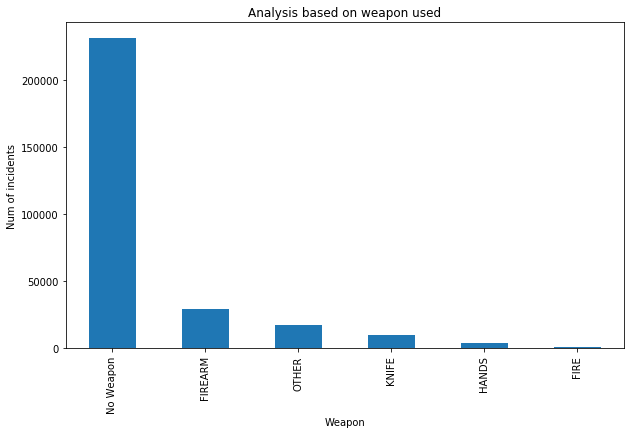

In [23]:
# Analysis based on weapon used.

fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Analysis based on weapon used")
ax.grid(True)
df["Weapon"].value_counts().plot.bar(x = "Weapon", y = "Num of incidents")
ax.set(xlabel = "Weapon", ylabel = "Num of incidents")
plt.show()

Most of the incidents are without the use of any kind of weapon. There are more incidents with firearm weapon than knife. Very few incidents involve fire.

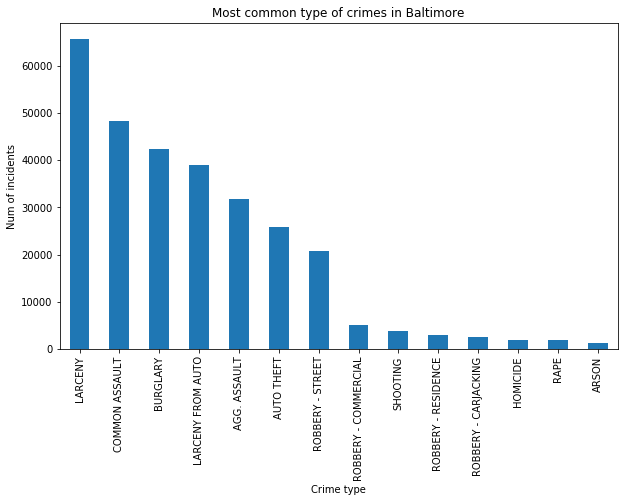

In [24]:
# Most common type of crimes in Baltimore.

fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Most common type of crimes in Baltimore")
ax.grid(True)
df["Description"].value_counts().plot.bar(x = "Description", y = "Num of incidents")
ax.set(xlabel = "Crime type", ylabel = "Num of incidents")
plt.show()

Larceny is the most common kind of crime in Baltimore and Arson is the least common one.

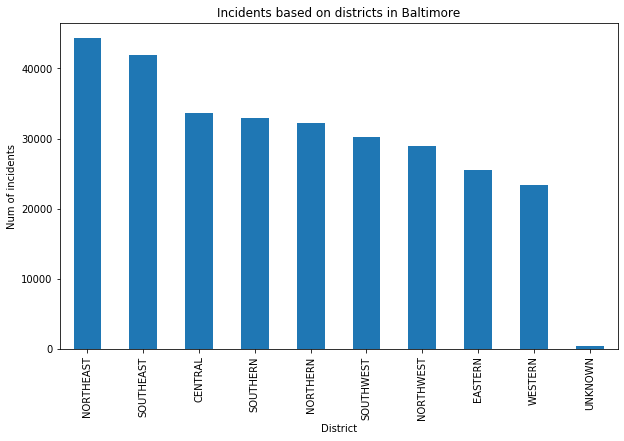

In [25]:
# Incidents based on districts in Baltimore.

fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Incidents based on districts in Baltimore")
ax.grid(True)
df["District"].value_counts().plot.bar(x = "District", y = "Num of incidents")
ax.set(xlabel = "District", ylabel = "Num of incidents")
plt.show()

Northeast district has more number of crimes reported and Western district has least number of crimes reported.

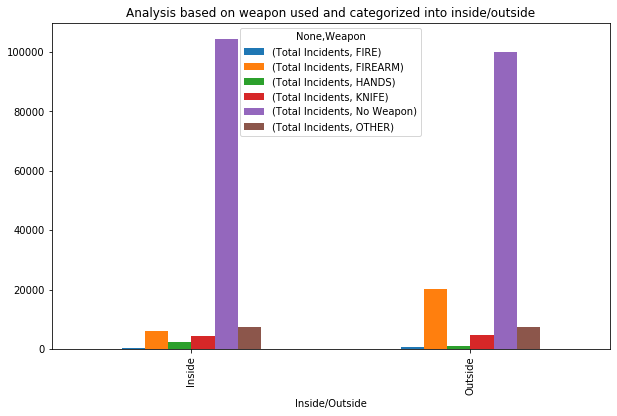

In [26]:
#Analysis based on weapon used and categorized into inside/outside.

fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Analysis based on weapon used and categorized into inside/outside")
df[["Inside/Outside", "Weapon", "Total Incidents"]].pivot_table(index="Inside/Outside"
                                                                , columns = "Weapon", aggfunc = "sum").plot.bar(ax=ax)
plt.show()

There are more incidents with firearm and fire outside and more incidents with hands inside.

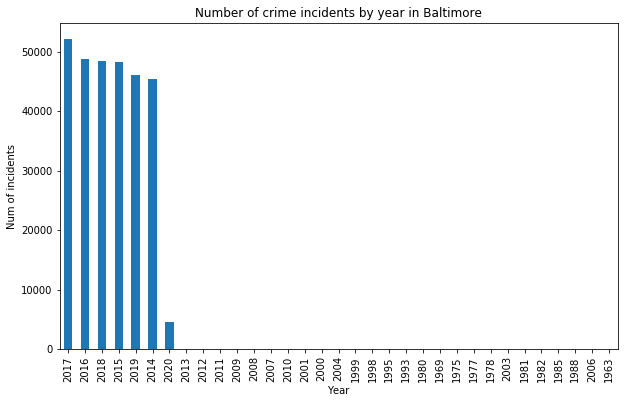

In [27]:
# Number of crime incidents by year in Baltimore.

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Number of crime incidents by year in Baltimore")
df["Year"].value_counts().plot.bar(ax=ax)
ax.set(xlabel = "Year", ylabel = "Num of incidents")
plt.show()

Year 2017 has highest number of incidents reported.

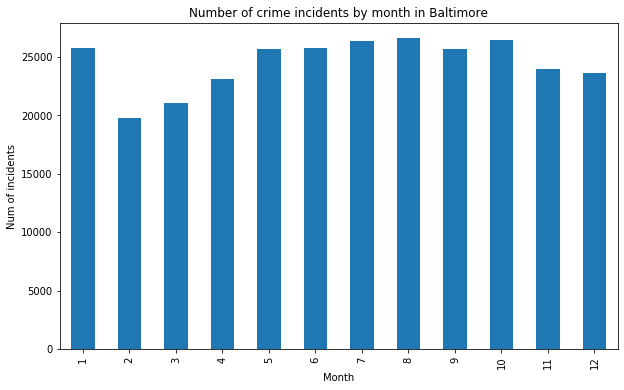

In [28]:
# Number of crime incidents by month in Baltimore.

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Number of crime incidents by month in Baltimore")
df.groupby("Month")["Total Incidents"].sum().plot.bar(ax=ax)
ax.set(xlabel = "Month", ylabel = "Num of incidents")
plt.show()

August month has the highest number of incidents reported and February has the least number of incidents reported. It appears that the hot months like August and July have higher crime rate compared to cold months February and December.

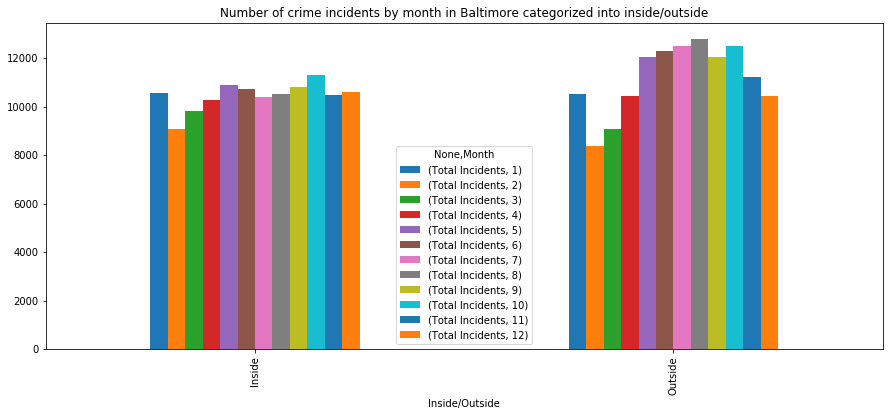

In [29]:
# Number of crime incidents by month in Baltimore categorized into inside/outside.

fig, ax = plt.subplots(figsize = (15,6))
ax.set_title("Number of crime incidents by month in Baltimore categorized into inside/outside")
df[["Inside/Outside", "Month", "Total Incidents"]].pivot_table(index="Inside/Outside"
                                                                , columns = "Month", aggfunc = "sum").plot.bar(ax=ax)
plt.show()

Comparing inside and outside, the hot months like May, June, July and August have more incidents reported outside and cold months like December, January and February have more incidents reported inside.

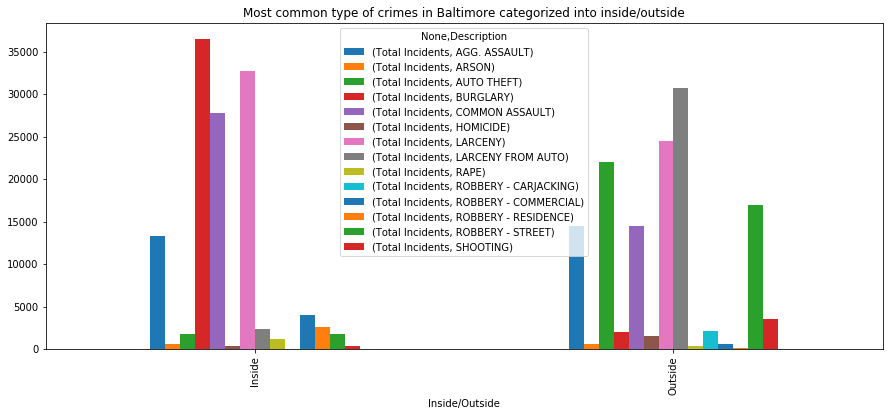

In [30]:
# Most common type of crimes in Baltimore categorized into inside/outside.

fig, ax = plt.subplots(figsize = (15,6))
ax.set_title("Most common type of crimes in Baltimore categorized into inside/outside")
df[["Inside/Outside", "Description", "Total Incidents"]].pivot_table(index="Inside/Outside"
                                                                , columns = "Description", aggfunc = "sum").plot.bar(ax=ax)
plt.show()

Shooting, robbery, homicide are committed more often outside and Larceny, the highest reported incident is often inside.

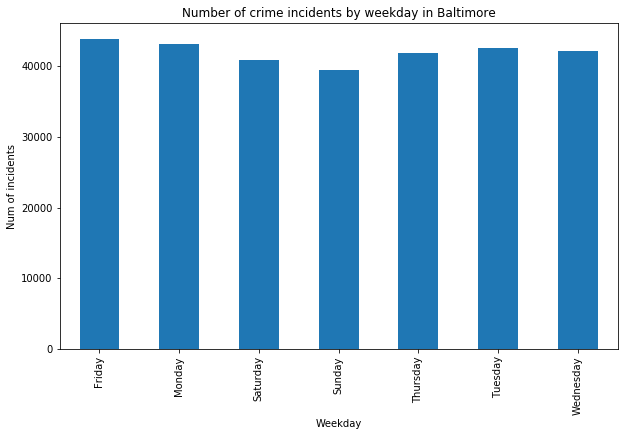

In [31]:
# Number of crime incidents by weekday in Baltimore.

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Number of crime incidents by weekday in Baltimore")
df.groupby("Weekday")["Total Incidents"].sum().plot.bar(ax=ax)
ax.set(xlabel = "Weekday", ylabel = "Num of incidents")
plt.show()

Friday has the highest number of incidents reported and Sunday has the least.

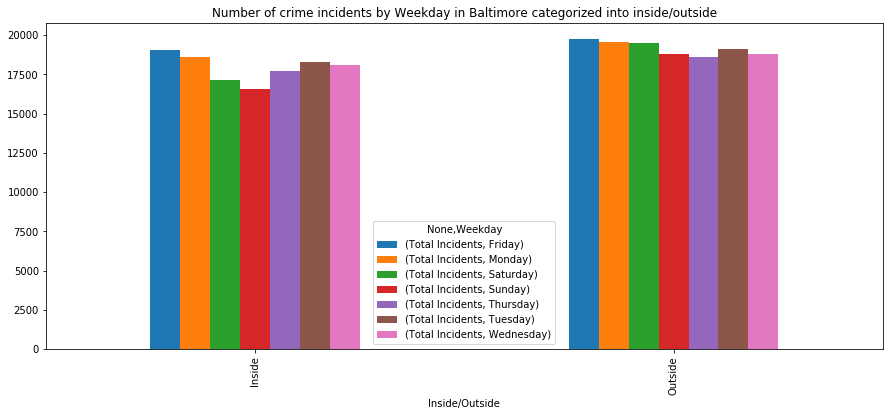

In [34]:
# Number of crime incidents by Weekday in Baltimore categorized into inside/outside.

fig, ax = plt.subplots(figsize = (15,6))
ax.set_title("Number of crime incidents by Weekday in Baltimore categorized into inside/outside")
df[["Inside/Outside", "Weekday", "Total Incidents"]].pivot_table(index="Inside/Outside"
                                                                , columns = "Weekday", aggfunc = "sum").plot.bar(ax=ax)
plt.show()

Comparing inside and outside, the incidents reported outside are almost uniform throughout the week. But the incidents reported inside are lowest during weekend (Saturday and Sunday) and highest during weekdays.

### Summary:

To summarize, 
- Northeast district has the highest number of crimes reported in Baltimore. 
- The most common type of crime is Larceny and the common weapon is Firearm.
- The type of crime that is commonly reported to occur indoors is Larceny
- 2017 has the highest crime incidents reported in Baltimore.
- August month has the highest and February has the least crime incidents reported in Baltimore.
- Summer months like August and July have higher crime rate compared to Winter months December and February.
- Crime incidents reported during weekend(Saturday and Sunday) are lowest compared to weekdays.
- The common weapon used for the crimes reported outdoors is Firearm. 